In [14]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.datasets import load_wine
df = load_wine()
display(df)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [16]:
df = pd.DataFrame(df['data'], columns = df['feature_names'])
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [18]:
#Padronizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
print(data_scaled[:5])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


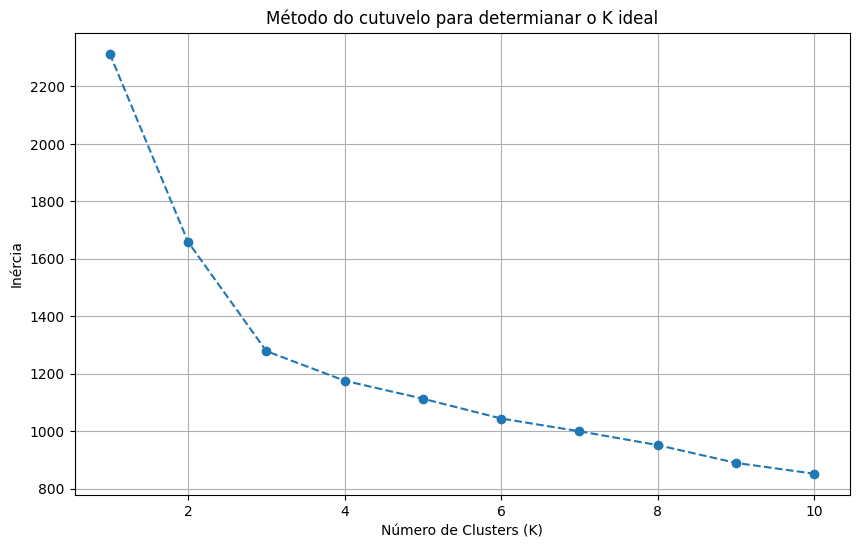

In [19]:
#Determinando o K usando o metodo do cutuvelo
inertia_values =[]
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(data_scaled)
  inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do cutuvelo para determianar o K ideal')
plt.grid(True)
plt.show()

K = 3, pois é a partir do terceiro ponto que a curve se acentua.

In [26]:
k = 3

#Criando um instância do modelo kmeans
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)

#Treinando os modelos padronizados
kmeans.fit(data_scaled)

#Obtenha as etiquetas dos clusters para cada cliente
labels = kmeans.labels_

#Calcular manualmente os centroides de cada cluster
import numpy as np
centroids = np.zeros((k, data_scaled.shape[1]))

#Calculando os centroides manualmente
for cluster_label in range(k):
    cluster_data = data_scaled[labels == cluster_label] #selecioanar os dados pertencentes ao cluster
    cluster_centroid = np.mean(cluster_data, axis = 0) #calcular a media das caracteristicas do cluster
    centroids[cluster_label] = cluster_centroid

print(f"Coordenadas dos centroids: {centroids}")

Coordenadas dos centroids: [[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]


Calculando distâncias dos centroides

In [27]:
from scipy.spatial import distance
#Calcular as distancias entre os centroides
distances = np.zeros((k, k))

for i in range(k):
  for j in range(k):
      distances[i, j] = distance.euclidean(centroids[i], centroids[j])

print(f"Distancias entre os centroides: {distances}")

Distancias entre os centroides: [[0.         3.97440678 5.04193227]
 [3.97440678 0.         3.59453165]
 [5.04193227 3.59453165 0.        ]]


**Visualização dos resultados**

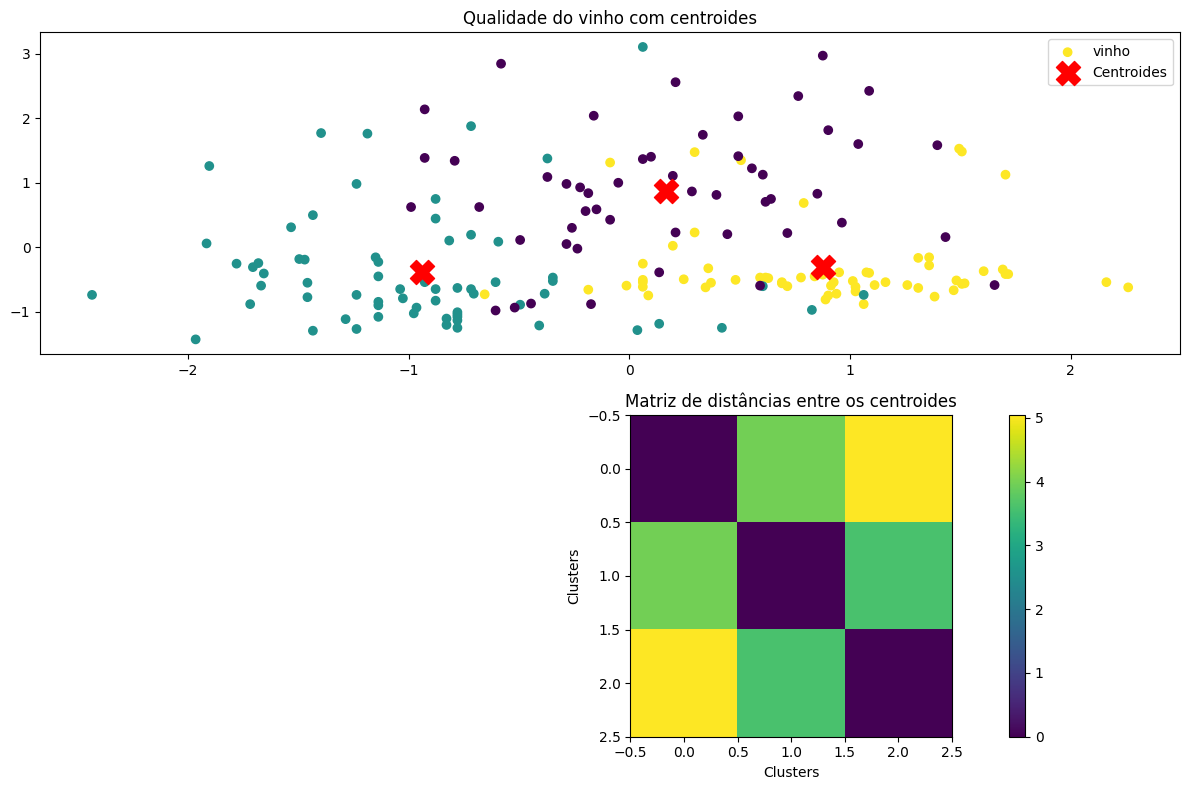

In [38]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', label='vinho')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroides', marker='X')
plt.title('Qualidade do vinho com centroides')
plt.legend()

#Matriz de distancias
plt.subplot(2,1,2)
plt.imshow(distances, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de distâncias entre os centroides')
plt.xlabel('Clusters')
plt.ylabel('Clusters')

plt.tight_layout()
plt.show()

Plotando Heatmap

In [28]:
features =scaler.fit(df)
features =features.transform(df)
scaled_df =pd.DataFrame(features,columns=df.columns)
scaled_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


<Axes: >

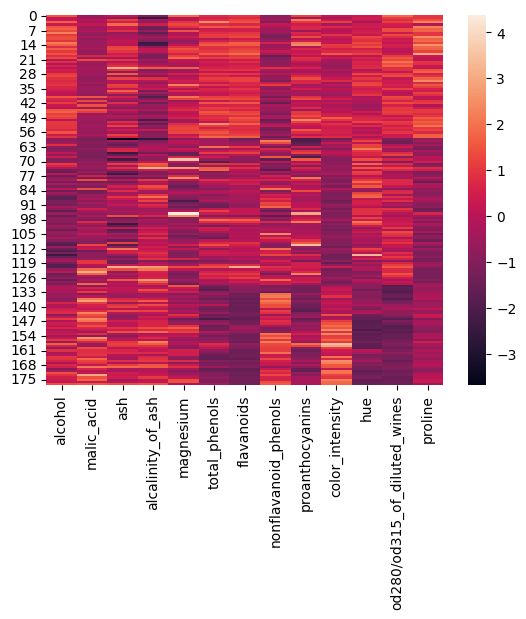

In [29]:
sns.heatmap(scaled_df)

Aplicar Técnica de Redução de Dimensionalidade PCA
A Análise de Componentes Principais é uma técnica que transforma dados de alta dimensão em dados de menor dimensão, mantendo o máximo de informações possível.

O número de variáveis ​​diminui, o que simplifica análises posteriores.
Podemos então visualizar os componentes do PCA_, ou seja, os eixos principais no espaço de características, que representam as direções de variância máxima no conjunto de dados. Esses componentes são classificados por variância_explicada.

Minimize o conjunto de dados de 15 recursos para 2 recursos usando análise de componentes principais (PCA).

In [31]:
x = scaled_df.values
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [32]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(x),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


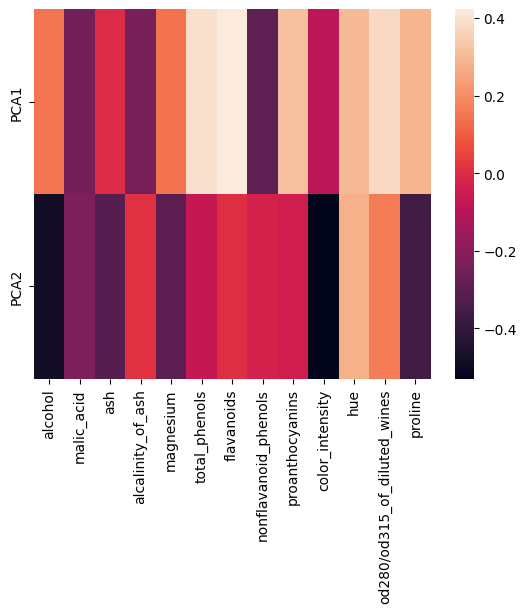

In [33]:
component_df = pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df.columns)
# Heat map
sns.heatmap(component_df)
plt.show()

Aqui mostra quais componentes são mais determinantes para a qualidade do vinho